# 포물선 운동

import부터 해주자.

## 공기 저항이 없는 경우

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from differential_equation import rk2_algorithm
%matplotlib inline

초기 조건에서 $x, \dot{x}, y, \dot{y}$를 신경써야 한다.

In [2]:
x = 0
y = 0
v_x = 100
v_y = 100
y_init = np.array([x, v_x, y, v_y])

이제 `projectile`함수를 코딩하자.

In [3]:
def projectile(y, t):
    a_y = -9.8
    a_x = 0
    v_x = y[1]
    v_y = y[3]
    return np.array([v_x, a_x, v_y, a_y])

평소 하던 대로 미분방정식을 풀자.

In [4]:
solution = rk2_algorithm(projectile, 0, 15, y_init, 1000)

그래프를 그려보자.

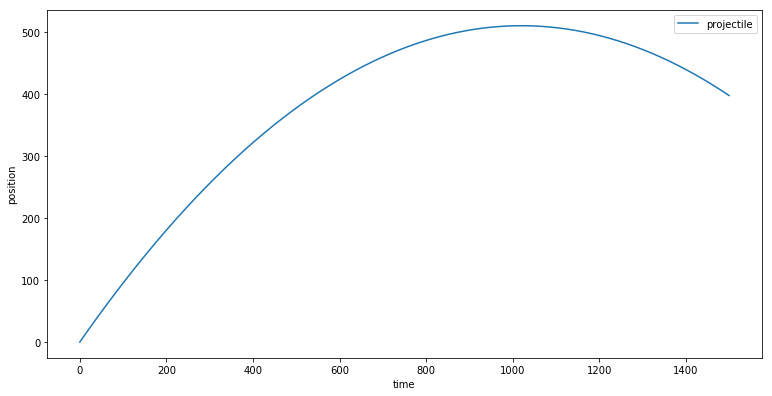

In [5]:
plt.figure(figsize=(12.8, 6.4))
plt.plot(solution[0][:,0], solution[0][:,2], '-', label='projectile')
plt.legend()
plt.xlabel('time')
plt.ylabel('position')
plt.show()

## 공기 저항이 있는 경우
공기 저항인 경우는 다음과 같은 식을 이용한다.

$$
m\ddot{x} = -c\dot{x}
$$

$$
m\ddot{y} = -mg - c\dot{y}
$$

In [6]:
def projectile_with_resistance(y, t):
    m = 10
    c = 1
    a_y = -9.8 - (c / m) * y[3]
    a_x = -(c / m) * y[1]
    v_x = y[1]
    v_y = y[3]
    return np.array([v_x, a_x, v_y, a_y])

미분방정식을 풀어보자.

In [7]:
solution_with_resistance = rk2_algorithm(projectile_with_resistance, 0, 15, y_init, 1000)

그래프도 그려보자.

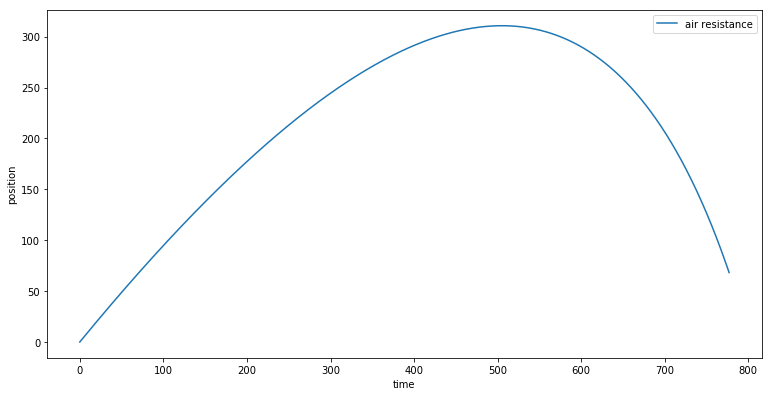

In [8]:
plt.figure(figsize=(12.8, 6.4))
plt.plot(solution_with_resistance[0][:,0], solution_with_resistance[0][:,2], '-', label='air resistance')
plt.legend()
plt.xlabel('time')
plt.ylabel('position')
plt.show()

비교해 보자.

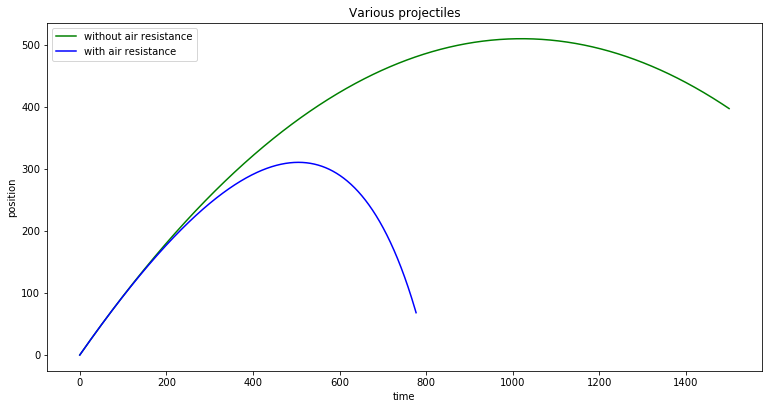

In [9]:
plt.figure(figsize=(12.8, 6.4))
plt.title('Various projectiles')
plt.plot(solution[0][:,0], solution[0][:,2], 'g-', label='without air resistance')
plt.plot(solution_with_resistance[0][:,0], solution_with_resistance[0][:,2], 'b-', label='with air resistance')
plt.legend()
plt.xlabel('time')
plt.ylabel('position')
plt.show()